In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#####labor
shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']

shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]

#####labor wage pivot get relative shortages

labor_wage=shocks_lm.drop_duplicates(subset=['r','sk']).merge(pl_rpt0,left_on=['r','sk'],right_on=['region','skill'],how='inner')
labor_wage['wage_diff']=labor_wage['pl_shock0']-1
limit_states=['HI','WY','VT','AK','TN','DC','NH','WV']
labor_wage=labor_wage[~(labor_wage['region'].isin(limit_states))]
labor_wage_skl=labor_wage[(labor_wage['skill']=='skl') ]
labor_wage_unskl=labor_wage[(labor_wage['skill']=='unskl') & (~labor_wage['pct_shock'].isin(limit_states))]


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']


NameError: name 'pl_rpt0' is not defined

In [33]:
##### import GAMS results
#########Benchmark characteristics
##############################################################################
##############################################################################

t='_d2_v2'

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

#########Full Result characteristics
##############################################################################
##############################################################################

###set file for imports
t='_d2_v2'

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/pl_rpt0.csv'%t)


###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/pc_rpt0.csv'%t)


####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/y_rpt0.csv'%t)


ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/ys0_rpt.csv'%t)


####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/py_rpt0.csv'%t)




In [22]:
########run without producer substitution

In [23]:
# ####plot labor endowment changes
# fig, ax = plt.subplots(1, 1,figsize=(15,6))
# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).reset_index()
# sns.set_theme(style="whitegrid")
# g = sns.barplot(
#     data=shocks_lm,
#     x="r", y='pct_shock',hue='sk',
#    palette=['#111111','#777777'])
# plt.legend(loc='upper left')
# plt.ylabel("Pct Change")


##### Get Trade Substitution Results

In [34]:
trade_exp=['staticmodel_d2_v2_it0_1.6_1_2','staticmodel_d2_v2_it0_1.3_1_2','staticmodel_d2_v2_it0_2.5_1_2','staticmodel_d2_v2_it0_1.6_1_1.6','staticmodel_d2_v2_it0_1.6_1_3.0']



In [35]:
pl_rpt0=pl_rpt0[pl_rpt0['file'].isin(trade_exp)]
pl_rpt0['subs']=pl_rpt0['file'].apply(lambda x:x.split("_")[4])+"_"+ pl_rpt0['file'].apply(lambda x:x.split("_")[5])+"_"+ pl_rpt0['file'].apply(lambda x:x.split("_")[6])
pl_rpt0=pl_rpt0[~pl_rpt0['region'].isin(['AK','DC','HI','NH','VT','WY','WV'])]



In [36]:
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1

In [37]:
pl_pvt=pl_rpt0.pivot_table(index=['region','skill'],columns='subs',values='pl_diff').reset_index()


In [39]:
pl_pvt[r'$\sigma_{l}$ = $1.3$']=pl_pvt['1.3_1_2']-pl_pvt['1.6_1_2']
pl_pvt[r'$\sigma_{l}$ = $2.5$']=pl_pvt['2.5_1_2']-pl_pvt['1.6_1_2']
# pl_pvt[r'$\sigma_{g}$ = $.5\bar{\sigma}_{g}$']=pl_pvt['1.6_0.5_2']-pl_pvt['1.6_1_2']
pl_pvt[r'$\sigma_{d}$ = $1.6$']=pl_pvt['1.6_1_1.6']-pl_pvt['1.6_1_2']
pl_pvt[r'$\sigma_{d}$ = $3$']=pl_pvt['1.6_1_3.0']-pl_pvt['1.6_1_2']

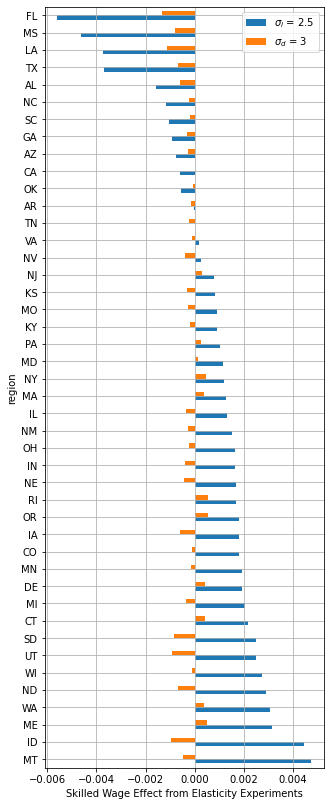

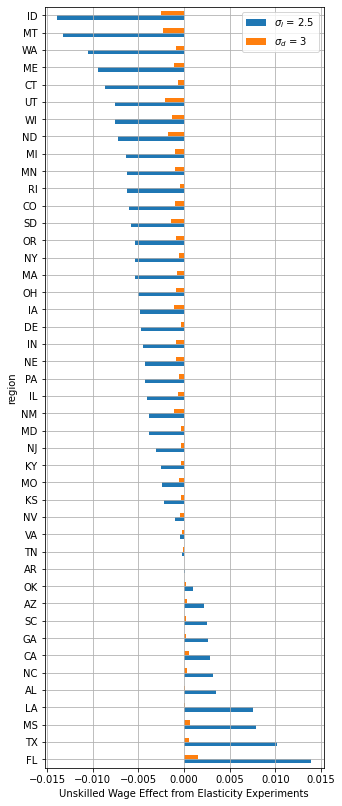

In [42]:
####plot horizontal par chart of wage changes by skill type

for skl,lab in zip(['skl','unskl'],['Skilled','Unskilled']):
    
    fig, ax = plt.subplots(1, 1,figsize=(5,14))
    
    pl_pvt_lm=pl_pvt[pl_pvt['skill']==skl]
    
    pl_pvt_lm=pl_pvt_lm.sort_values(by=r'$\sigma_{l}$ = $2.5$',ascending=False)
    
    pl_pvt_lm=pl_pvt_lm[['region','$\\sigma_{l}$ = $2.5$',
 '$\\sigma_{d}$ = $3$']]

    pl_pvt_lm.set_index('region').plot(kind='barh',ax=ax)
    plt.xlabel('%s Wage Effect from Elasticity Experiments'%lab)
    plt.grid()
    plt.legend()

In [34]:
pl_pvt

subs,region,0.9_1_2,1.6_0.5_2,1.6_1_1.0,1.6_1_2
0,AL,0.002263,0.003419,0.004285,0.003800
1,AR,-0.001067,-0.001334,-0.000645,-0.000946
2,AZ,-0.004672,-0.003992,-0.003435,-0.003594
3,CA,-0.009808,-0.008455,-0.008149,-0.007976
4,CO,0.018243,0.015018,0.016148,0.015316
5,CT,0.006333,0.001065,0.001956,0.001623
6,DE,-0.001016,-0.003343,-0.002791,-0.002903
7,FL,-0.003125,0.003043,0.003356,0.003281
8,GA,-0.003452,-0.002484,-0.001890,-0.002109
9,IA,0.021963,0.019599,0.021150,0.019919


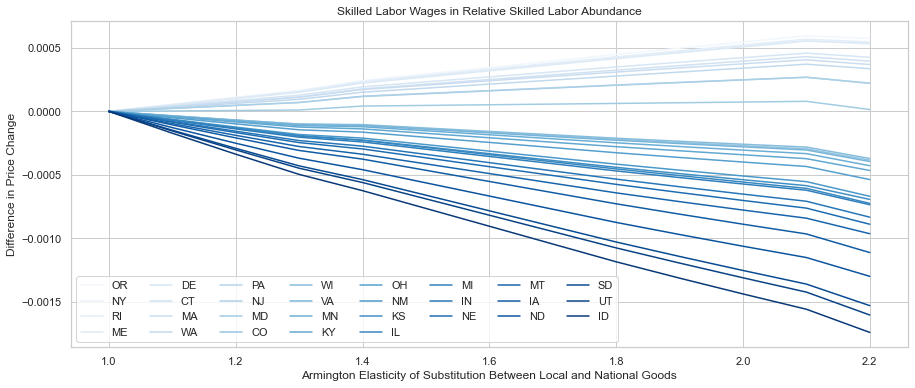

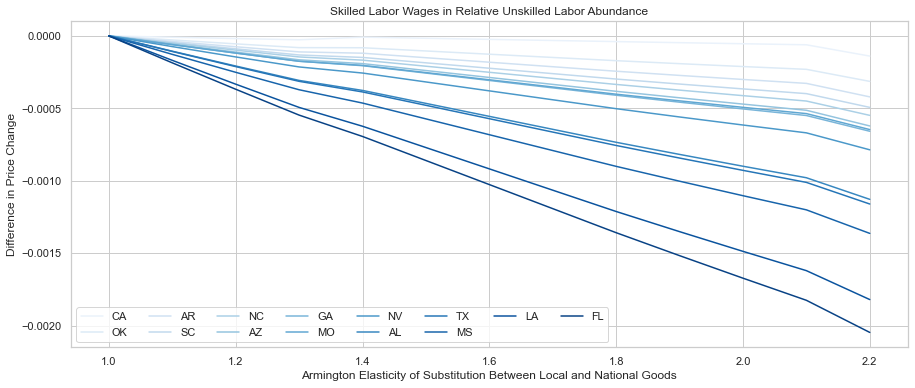

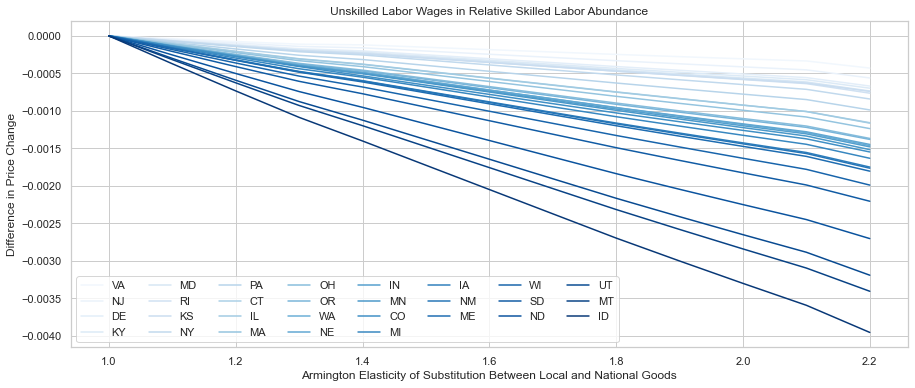

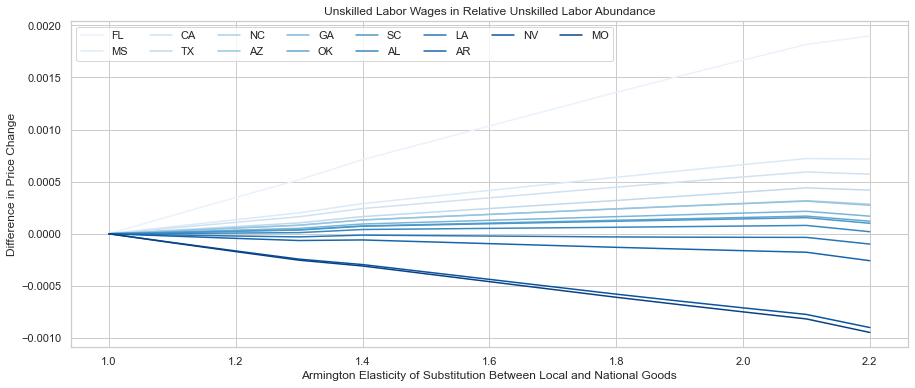

In [28]:
skill_abundance=labor_wage_pvt[labor_wage_pvt['difference']>0]['r'].unique()
not_skill_abundance=labor_wage_pvt[labor_wage_pvt['difference']<0]['r'].unique()

for sk, slab in zip(['skl','unskl'],['Skilled','Unskilled']):
    for lst, lab in zip([skill_abundance,not_skill_abundance],['Skilled Labor Abundance','Unskilled Labor Abundance']):
        pl_rpt0_sk=pl_rpt0[pl_rpt0['skill']==sk]

        ####take difference from first price
        first_dates = pl_rpt0_sk.groupby('region')['pl_diff'].first()
        pl_rpt0_sk=pl_rpt0_sk.sort_values(by='region')
        pl_rpt0_sk['Difference in Price Change'] = (pl_rpt0_sk.set_index('region')['pl_diff'] - first_dates).values

        ####get first difference and assign graident color scheme accordingly

        first_diff=pd.DataFrame()
        for r in pl_rpt0_sk['region'].unique():
            tmp=pl_rpt0_sk[(pl_rpt0_sk['region']==r) & (pl_rpt0_sk['esubl']==1.1) ]
            tmp['first_diff']=tmp['Difference in Price Change']
            tmp=tmp[['region','first_diff']]
            first_diff=first_diff.append(tmp)

        pl_rpt0_sk=pl_rpt0_sk.merge(first_diff,on='region')

        pl_rpt0_lm=pl_rpt0_sk[(pl_rpt0_sk['region'].isin(lst))].sort_values(by='first_diff',ascending=False).reset_index()

        sns.set_theme(style="whitegrid")
        fig, ax = plt.subplots(1, 1,figsize=(15,6))

        sns.set_palette("PuBuGn_d")
        g = sns.lineplot(
            data=pl_rpt0_lm,  x="esubl", y='Difference in Price Change',hue='region', palette="Blues"
        )
        plt.legend(ncol=8)
        plt.xlabel('Armington Elasticity of Substitution Between Local and National Goods')
        plt.title('%s Labor Wages in Relative %s'%(slab,lab))

